# Model Training & Evaluation

This notebook trains multiple machine learning models, evaluates their performance, and selects the best model based on F1 score.

## import numpy as np

In [41]:
! pip install xgboost

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import joblib
import time

## Load prepared data

In [43]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')
X_train_resampled = np.load('X_train_resampled.npy')
y_train_resampled = np.load('y_train_resampled.npy')

## Function to train and evaluate a model

In [44]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\nTraining {model_name}...")
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print metrics
    print(f"Training time: {time.time() - start_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'confusion_matrix_{model_name.replace(" ", "_").lower()}.png')
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # For binary classification, plot ROC curve if the model supports predict_proba
    if len(np.unique(y_test)) == 2 and hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.savefig(f'roc_curve_{model_name.replace(" ", "_").lower()}.png')
    
    # Save the model
    joblib.dump(model, f'{model_name.replace(" ", "_").lower()}.joblib')
    
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm,
        'y_pred': y_pred
    }

## 1. Baseline Model: Gaussian Naive Bayes

In [45]:
#nao funciona
#baseline_model = MultinomialNB(alpha=1.0)
#baseline_results = train_and_evaluate(
#    baseline_model, X_train, y_train, X_test, y_test, "Naive Bayes Baseline"
#)


Training Naive Bayes Baseline...
Training time: 0.87 seconds
Accuracy: 0.4738
Precision: 0.4835
Recall: 0.4738
F1 Score: 0.4707

Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.75      0.64      5437
           2       0.16      0.28      0.20      1650
           3       0.27      0.25      0.26      3240
           4       0.43      0.29      0.35      6592
           5       0.61      0.55      0.58      9556

    accuracy                           0.47     26475
   macro avg       0.40      0.43      0.40     26475
weighted avg       0.48      0.47      0.47     26475



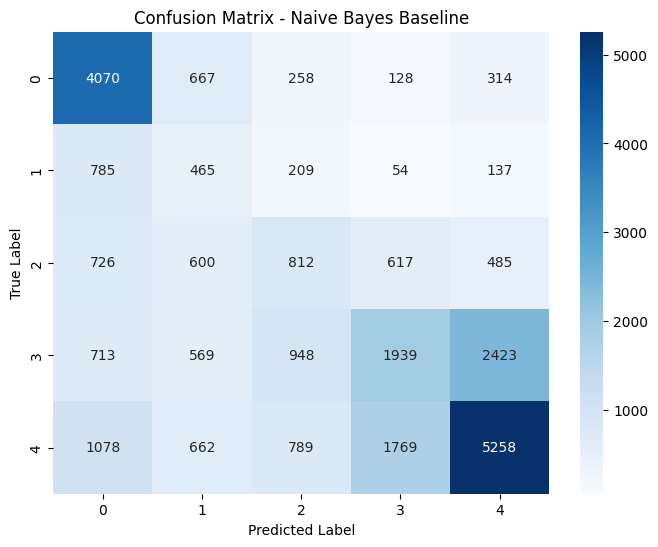

In [46]:
from sklearn.naive_bayes import GaussianNB
baseline_model = GaussianNB()
baseline_results = train_and_evaluate(baseline_model, X_train, y_train, X_test, y_test, "Naive Bayes Baseline")

## 2. Logistic Regression


Training Logistic Regression...
Training time: 9.45 seconds
Accuracy: 0.5240
Precision: 0.5538
Recall: 0.5240
F1 Score: 0.5327

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.74      0.71      5437
           2       0.21      0.45      0.29      1650
           3       0.32      0.38      0.35      3240
           4       0.45      0.36      0.40      6592
           5       0.68      0.57      0.62      9556

    accuracy                           0.52     26475
   macro avg       0.47      0.50      0.48     26475
weighted avg       0.55      0.52      0.53     26475



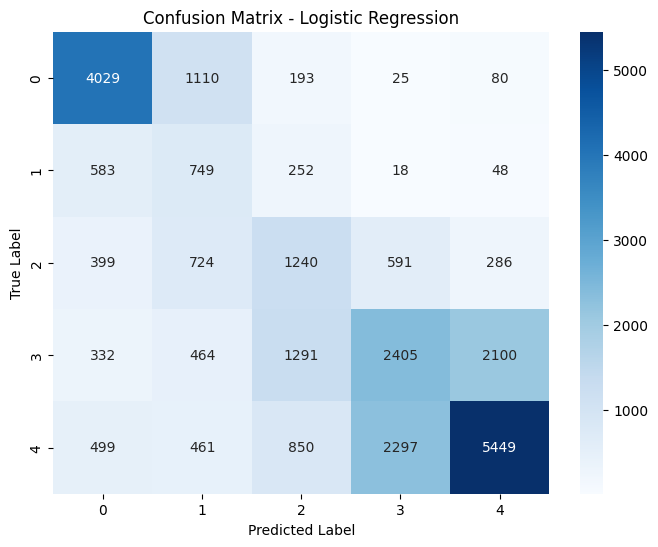

In [47]:
lr_model = LogisticRegression(
    C=1.0, 
    max_iter=1000, 
    class_weight='balanced',
    random_state=42
)
lr_results = train_and_evaluate(
    lr_model, X_train, y_train, X_test, y_test, "Logistic Regression"
)

## 3. Random Forest


Training Random Forest...
Training time: 256.91 seconds
Accuracy: 0.5485
Precision: 0.5146
Recall: 0.5485
F1 Score: 0.4907

Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.88      0.72      5437
           2       0.42      0.03      0.06      1650
           3       0.46      0.18      0.26      3240
           4       0.44      0.21      0.29      6592
           5       0.55      0.80      0.65      9556

    accuracy                           0.55     26475
   macro avg       0.49      0.42      0.40     26475
weighted avg       0.51      0.55      0.49     26475



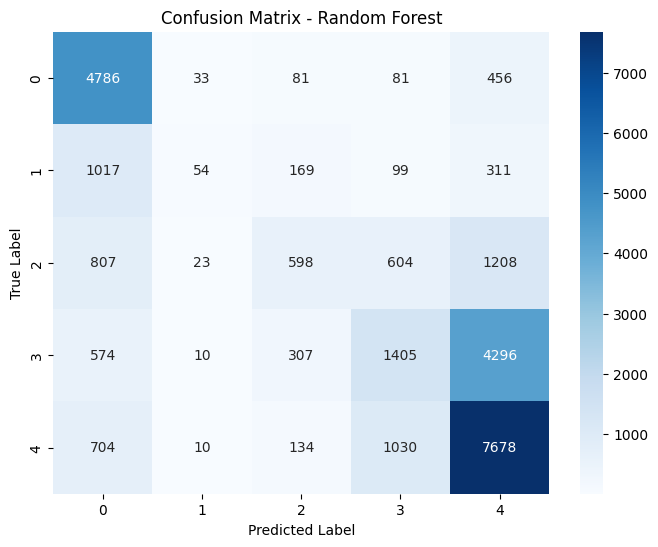

In [48]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)
rf_results = train_and_evaluate(
    rf_model, X_train, y_train, X_test, y_test, "Random Forest"
)

## 4. Linear SVM


Training Linear SVM...
Training time: 9.99 seconds
Accuracy: 0.5487
Precision: 0.5372
Recall: 0.5487
F1 Score: 0.5318

Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.87      0.72      5437
           2       0.22      0.27      0.25      1650
           3       0.36      0.35      0.35      3240
           4       0.47      0.27      0.35      6592
           5       0.65      0.67      0.66      9556

    accuracy                           0.55     26475
   macro avg       0.47      0.49      0.47     26475
weighted avg       0.54      0.55      0.53     26475



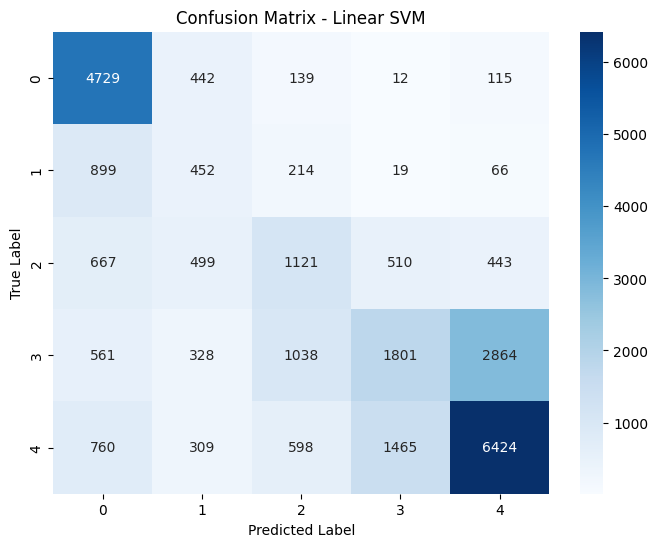

In [49]:
svm_model = LinearSVC(
    C=1.0,
    class_weight='balanced',
    max_iter=5000,
    random_state=42
)
svm_results = train_and_evaluate(
    svm_model, X_train, y_train, X_test, y_test, "Linear SVM"
)

## 5. XGBoost

Original values: [1 2 3 4 5]
Transformed values: [0 1 2 3 4]
Mapping: {np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4}

Training XGBoost...
Training time: 49.51 seconds
Accuracy: 0.5163
Precision: 0.5345
Recall: 0.5163
F1 Score: 0.5218

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70      5437
           1       0.21      0.39      0.27      1650
           2       0.35      0.34      0.35      3240
           3       0.42      0.39      0.40      6592
           4       0.65      0.56      0.60      9556

    accuracy                           0.52     26475
   macro avg       0.46      0.48      0.47     26475
weighted avg       0.53      0.52      0.52     26475



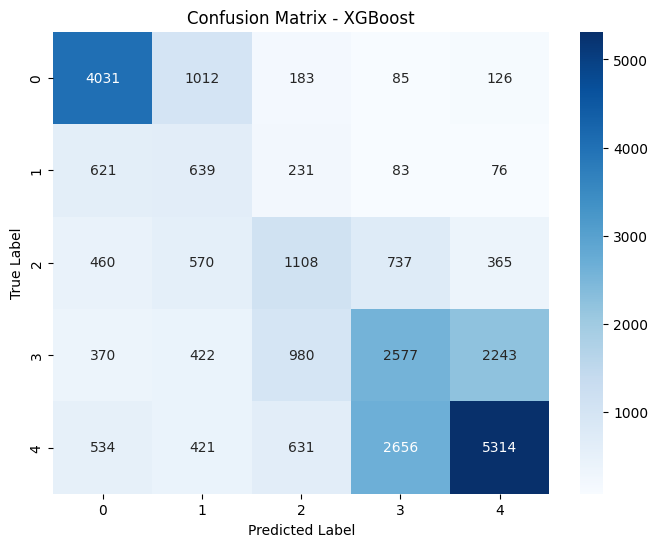

In [50]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder that will map both training and test data consistently
le = LabelEncoder()

# Fit to all possible values (1-5)
le.fit(np.array([1, 2, 3, 4, 5]))

# Transform both datasets with the same encoder
y_train_resampled_encoded = le.transform(y_train_resampled)
y_test_encoded = le.transform(y_test)

# Verify the transformation
print("Original values:", np.unique(y_train_resampled))
print("Transformed values:", np.unique(y_train_resampled_encoded))
print("Mapping:", dict(zip(le.classes_, range(len(le.classes_)))))

# Initialize and train XGBoost with the encoded labels
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

xgb_results = train_and_evaluate(
    xgb_model, X_train_resampled, y_train_resampled_encoded, X_test, y_test_encoded, "XGBoost"
)

## Compare all model results

In [52]:
models_df = pd.DataFrame([
    baseline_results,
    lr_results,
    rf_results,
    svm_results,
    xgb_results
])

metrics = ['accuracy', 'precision', 'recall', 'f1']
models_df = models_df[['model_name'] + metrics]

## Plot model comparison

<Figure size 1200x800 with 0 Axes>

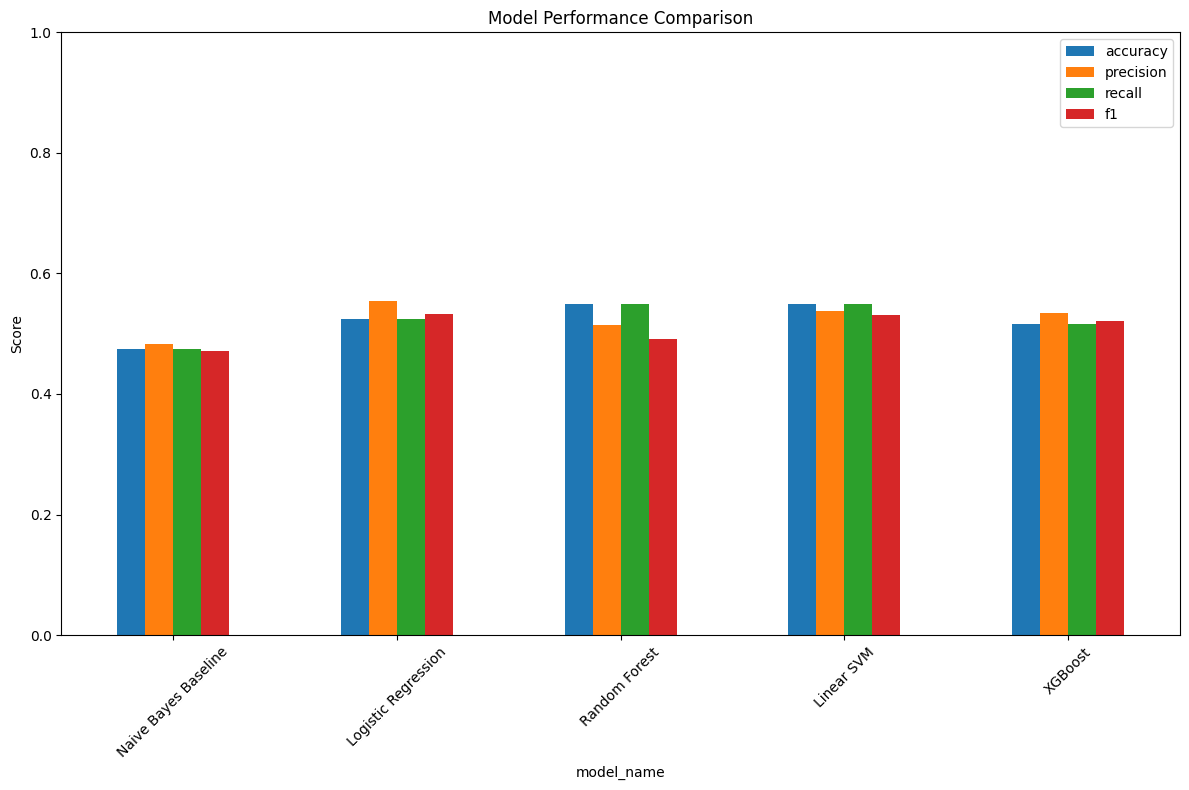

In [57]:
plt.figure(figsize=(12, 8))
models_df.set_index('model_name')[metrics].plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('model_comparison.png')
plt.close()

## Print model comparison

In [60]:
print("\nModel Performance Comparison:")
print(models_df)
print(models_df.model_name)


Model Performance Comparison:
             model_name  accuracy  precision    recall        f1
0  Naive Bayes Baseline  0.473805   0.483473  0.473805  0.470701
1   Logistic Regression  0.523966   0.553814  0.523966  0.532707
2         Random Forest  0.548480   0.514619  0.548480  0.490743
3            Linear SVM  0.548706   0.537225  0.548706  0.531773
4               XGBoost  0.516298   0.534515  0.516298  0.521793
0    Naive Bayes Baseline
1     Logistic Regression
2           Random Forest
3              Linear SVM
4                 XGBoost
Name: model_name, dtype: object


## Select the best model based on F1 score

In [55]:
best_model_idx = models_df['f1'].idxmax()
best_model_name = models_df.loc[best_model_idx, 'model_name']
print(f"\nBest model based on F1 score: {best_model_name}")


Best model based on F1 score: Logistic Regression
